# A workshop to be titled


by: Sina Hajikazemi, Julia Barbosa
Date: 08.25


## Duality Theory in LPs

Consider the following optmization problem.  
$$
\begin{split}
\min & \quad f(x) \\
   \text{s.t.} &  \\
   & g(x) \geq 0  \\
\end{split}
$$

Then we defined the positive lagragian multipliers ( for each constraint) $p \in \Re^M_+ $ and the lagrangian relaxation function.
This function provides a lower bound, for $f(x)$ over the feasible set. 

$$L(x,p) := f(x) - p' \cdot g(x),  $$


Let $x^*$ be the solution of the problem above, then it can be shown that the function $k(p)$, which is defined as follows

$$ k(p) = \inf_{x} L(x,p), $$

is a lower bound of the *optmial* solution of the orginal OP. 

Proof: 
$$k(p) \leq L(x^*,p) = f(x^*) - p' \cdot g(x^*) \leq f(x^*) $$

(Note that no assumption of convexity of $f(x)$ and $-g(x)$ was made) 


### TASK1. 

Add the code to play with different functions and values of P. 


suggest some functions 

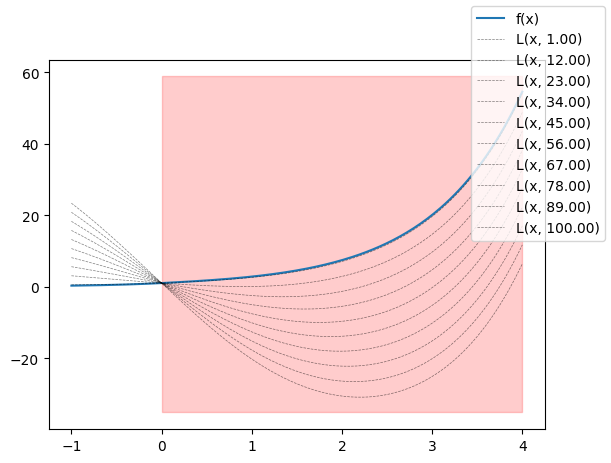

In [ ]:
from script import plot_lag_function
import numpy as np

#f = lambda x:  (x-2)*(x-4)
#g = lambda x: x +1

f = lambda x:  x**2
g = lambda x: np.sin(x)


# Dual Infeasibility
f = lambda x: x**3
g = lambda x: x-1

# Strong Duality does not hold.
f = lambda x: np.exp(x)+0.3*np.sin(x)*np.exp(-np.abs(x)) 
g = lambda x: -0.5 + 1/(1 + np.exp(-x))
ps = np.linspace(1, 100, 10)
linespace = np.linspace(-1, 4, 200)

plot_lag_function(f, g, ps, linespace) 

### TASK 2. 
Now we apply these concepts on the linear case. 

Consider the following LP

$$
\begin{split}
\min &  \quad c'x \\
   s.t.& \\
   &Ax \geq b \\
   \end{split}
$$

- a. Give an expression for the $k(p)$.
- b. Write the optmization problem that is equivalant to finding the maximum lower bound for the original LP. 

This problem is called the dual problem, a solution this 


Weak duality says that value of the primal objective function $c'x$ is always higher then the value of the dual objective funciton $p'b$ fo dual problem for any feasible solution $(x,p)$.

$$
c'x \geq p'b
$$


Under special conditions, which are always meet on the linear case, strong duality holds.
That is if a LP has an optimal solution, so does its dual, and the respective objective function values are equal. 

Now we can say that the LP could be replaced by a feasibility problem which consisis of (i) primal feasibility constraints, (ii) dual feasiblity constraints and (iii) strong duality constraint,  which forces the objective value primal problem to *be less then* the dual. 

This property can be used when an optmization problem needs to be replaced by a set of constraints. For example, in bi-level problems. 

### TASK 3 

Consider the linear bilevel problem: 

$$
\begin{split}
\min_{x,y} & \quad x+ y \\
\text{s.t.} &  \\
&-x -2y \geq  -10 \\
&-x + 2y \geq 0, \\
&x \geq 0, \\
& y \in \arg\min_{\bar y}\{\bar y : x+ \bar y \geq 3\}.
\end{split}
$$

- Plot the linear inequalities in a coordinate system
- Determine the bilevel feasible set of the Problem
- Complete  the following code ____________ to solve the problem. 



In [ ]:
from pyomo.environ import *

# Create a model
model = ConcreteModel()

# Define variables
model.x = Var(within=NonNegativeReals)  # x >= 0
model.y = Var()  # y is free, no constraints on y

# Define the objective function (minimize x + y)
model.obj = Objective(expr=model.x + model.y)

# Define constraints
model.constraint_1 = Constraint(expr=-model.x - 2*model.y >= -10)
model.constraint_2 = Constraint(expr=-model.x + 2*model.y >= 0)


# TODO: Add the constraints necessary represent the lower level optimization problem



# Solve the model using a solver (e.g., 'ipopt')
# solver = SolverFactory('gurobi')


# Solve the model
solver.solve(model, tee=True)

# Output the results
print(f"x = {model.x():.4f}")
print(f"y = {model.y():.4f}")

Set parameter Username
Academic license - for non-commercial use only - expires 2025-11-26
Read LP format model from file C:\Users\JULIAB~1\AppData\Local\Temp\tmpct509_b_.pyomo.lp
Reading time = 0.00 seconds
x1: 2 rows, 2 columns, 4 nonzeros
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 11.0 (22631.2))

CPU model: AMD Ryzen 7 PRO 4750U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 2 rows, 2 columns and 4 nonzeros
Model fingerprint: 0x9dec14e2
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+01, 1e+01]
Presolve removed 2 rows and 2 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 secon

### TASK 4 

Formulate your own problem and present to the group in a 2 minutes pitch for the group in the end. 

Possible directions: 
- Policy design
- Attack - defense 
- Leader-Follower dynamics


Hint your lower level can be a linery constraint strickly convex QP. 